In [47]:
import numpy as np
from sklearn.linear_model import LassoCV
import utils
from CoRT_builder import CoRT
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

<module 'utils' from 'D:\\Data Science Project\\CorT SI\\utils.py'>

In [21]:
# Start CorT
n_target = 100
n_source = 200
p = 500
K = 10
Ka = 8
h = 30
lamda = 0.1
s_vector = [0.4, 0.4, 0.4, 0.5, 0.5, 0.5, -0.6, -0.6, -0.6, -0.6]
T = 5
s = len(s_vector)
CoRT = CoRT()

target_data, source_data = CoRT.gen_data(n_target, n_source, p, K, Ka, h, s_vector, s, "AR")
similar_source_index = CoRT.find_similar_source(n_target, K, target_data, source_data, T=5, verbose=True)

X_combined, y_combined = CoRT.prepare_CoRT_data(similar_source_index, source_data, target_data)

model = LassoCV(cv=5, fit_intercept=True, random_state=42, n_jobs=-1)
model.fit(X_combined, y_combined.ravel())
beta_hat_target = model.coef_[-p:]

# SI
active_beta_hat_target = []
for b in beta_hat_target:
  if b != 0:
    active_beta_hat_target.append(b)

j = np.random.choice(np.arange(0, len(active_beta_hat_target)))

X_target = target_data["X"]
y_target = target_data["y"]
X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

Sigma = np.eye(n_target)
b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

TypeError: CoRT.find_similar_source() got an unexpected keyword argument 'verbose'

In [6]:
X_target = target_data["X"]
y_target = target_data["y"]
X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

Sigma = np.eye(n_target)
b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

folds= utils.split_target(T, X_target, y_target, n_target)

In [7]:
L_train, R_train = utils.get_Z_train(etajTy, folds, source_data, a_global, b_global, lamda, K, T)
L_val, R_val = utils.get_Z_val(folds, T, K, a_global, b_global, etajTy, lamda, source_data)
L_CoRT, R_CoRT = utils.get_Z_CoRT(X_combined, similar_source_index, lamda, a_global, b_global, source_data, etajTy)

In [19]:
print("="*100)
print(f"z_obs: {etajTy}")
print("="*100)
print(f"L_train: {L_train}")
print(f"R_train: {R_train}")
print("="*100)
print(f"L_val: {L_val}")
print(f"R_val: {R_val}")
print("="*100)
print(f"L_CoRT: {L_CoRT}")
print(f"R_CoRT: {R_CoRT}")

z_obs: -0.06391209961241484
L_train: -0.06513563587110455
R_train: -0.06339936474832128
L_val: -0.13244383718319747
R_val: -0.034550433471737384
L_CoRT: -1.1213912758549807
R_CoRT: 3.328926926045275


In [46]:
from CoRT_builder import CoRT
CoRTs = CoRT()

# Start Loop

In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing iteration 0
Total 2 similar sources: [1, 3]
Total 2 similar sources: [3, 5]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.186e-03, tolerance: 2.053e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.354e-03, tolerance: 1.851e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 1, 2, 3, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e-03, tolerance: 2.011e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e-03, tolerance: 2.011e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 10
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 2, 3, 4, 5, 6, 7]
Total 9 similar sources: [0, 1, 2, 3, 4, 5, 6, 7, 9]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e-02, tolerance: 6.060e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e-02, tolerance: 6.060e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 6 similar sources: [0, 1, 2, 3, 5, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 4 similar sources: [0, 1, 3, 5]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 20
Total 6 similar sources: [0, 1, 3, 5, 6, 7]
Total 4 similar sources: [0, 4, 6, 7]
Total 7 similar sources: [0, 1, 2, 3, 4, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 1, 2, 3, 5, 6, 7]
Total 7 similar sources: [0, 1, 2, 3, 4, 5, 6]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.440e-03, tolerance: 3.565e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.440e-03, tolerance: 3.565e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 9 similar sources: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 30
Total 6 similar sources: [0, 1, 2, 4, 5, 7]
Total 5 similar sources: [2, 3, 4, 5, 6]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.865e-03, tolerance: 2.713e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.865e-03, tolerance: 2.713e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 9 similar sources: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 6 similar sources: [0, 1, 2, 4, 5, 6]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 3 similar sources: [1, 2, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 40
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 3 similar sources: [2, 3, 7]
Total 6 similar sources: [0, 2, 3, 4, 5, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.330e-03, tolerance: 9.008e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.330e-03, tolerance: 9.008e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 50
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 3 similar sources: [1, 2, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 6 similar sources: [0, 2, 3, 4, 5, 6]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 1 similar sources: [6]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 60
Total 5 similar sources: [0, 1, 2, 4, 7]
Total 7 similar sources: [0, 1, 2, 3, 4, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 9 similar sources: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Tot

D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e-02, tolerance: 5.680e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e-02, tolerance: 5.680e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 5 similar sources: [1, 3, 4, 5, 7]
Processing iteration 70
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.549e-03, tolerance: 3.050e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.549e-03, tolerance: 3.050e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 1, 2, 3, 4, 5, 6]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 5 similar sources: [1, 2, 5, 6, 7]
Total 4 similar sources: [2, 5, 6, 7]
Processing iteration 80
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.519e-03, tolerance: 6.056e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.519e-03, tolerance: 6.056e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 6 similar sources: [1, 2, 3, 4, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 9 similar sources: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Total 3 similar sources: [2, 4, 5]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e-03, tolerance: 1.646e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e-03, tolerance: 1.646e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 7 similar sources: [1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Processing iteration 90
Total 4 similar sources: [1, 3, 4, 7]
Total 7 similar sources: [0, 2, 3, 4, 5, 6, 7]
Total 4 similar sources: [1, 2, 4, 6]
Total 6 similar sources: [1, 2, 3, 4, 5, 6]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 2 similar sources: [2, 7]
Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]


D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.455e-03, tolerance: 3.816e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.455e-03, tolerance: 3.816e-03
  model = cd_fast.enet_coordinate_descent(
D:\Data Science Project\CorT SI\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Total 8 similar sources: [0, 1, 2, 3, 4, 5, 6, 7]
Total 7 similar sources: [0, 2, 3, 4, 5, 6, 7]


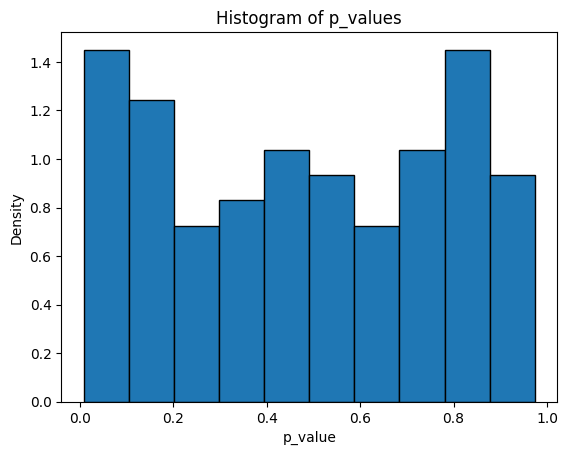

In [83]:
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
import utils
from CoRT_builder import CoRT
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

# Start CorT
n_target = 10
n_source = 200
p = 100
K = 10
Ka = 8
h = 30
lamda = 0.1
s_vector = [0.4, 0.4, 0.4, 0.5, 0.5, 0.5, -0.6, -0.6, -0.6, -0.6]
T = 5
s = len(s_vector)
iteration = 100
CoRT = CoRT(alpha=lamda)
p_value_list = []

for iter in range(iteration):
  if (iter%10==0):
    print(f"Processing iteration {iter}")

  target_data, source_data = CoRT.gen_data(n_target, n_source, p, K, Ka, h, s_vector, s, "AR")
  similar_source_index = CoRT.find_similar_source(n_target, K, target_data, source_data, T=T, verbose=True)

  X_combined, y_combined = CoRT.prepare_CoRT_data(similar_source_index, source_data, target_data)

  model = Lasso(alpha=lamda, fit_intercept=False, random_state=42)
  model.fit(X_combined, y_combined.ravel())
  beta_hat_target = model.coef_[-p:]

  active_beta_hat_target = []
  for b in beta_hat_target:
    if b != 0:
      active_beta_hat_target.append(b)

  j = np.random.choice(np.arange(0, len(active_beta_hat_target)))

  X_target = target_data["X"]
  y_target = target_data["y"]
  X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
  etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

  Sigma = np.eye(n_target)
  b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
  a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

  folds= utils.split_target(T, X_target, y_target, n_target)

  L_train, R_train = utils.get_Z_train(etajTy, folds, source_data, a_global, b_global, lamda, K, T)
  L_val, R_val = utils.get_Z_val(folds, T, K, a_global, b_global, etajTy, lamda, source_data)
  L_CoRT, R_CoRT = utils.get_Z_CoRT(X_combined, similar_source_index, lamda, a_global, b_global, source_data, etajTy)

  L_final, R_final = utils.combine_Z(L_train, R_train, L_val, R_val, L_CoRT, R_CoRT)

  beta_true = np.concatenate([s_vector, np.zeros((p - s))]).reshape(-1, 1)
  mu = X_target @ beta_true
  mu_z = etaj.T @ mu

  sigma_z = etaj.T @ Sigma @ etaj
  truncated_cdf = utils.computed_truncated_cdf(L_final, R_final, etajTy, 0, np.sqrt(sigma_z))
  p_value = 2 * min(truncated_cdf, 1 - truncated_cdf)
  p_value_list.append(p_value.item())

plt.hist(p_value_list, bins=10, density=True, edgecolor='black')
plt.title("Histogram of p_values")
plt.xlabel("p_value")
plt.ylabel("Density")
plt.show()